# **Lab 10: Logistic Regression**
# CS 391 E1: Foundations of Data Science, Spring 2021
### Dr. Dora Erdos (Instructor), Hannah Catabia (Teaching Fellow)

### **Sigmoid Function**

The sigmoid function is a logistic function defined as:

$$\sigma(x) =  \frac{1}{1+e^{-x}} = \frac{e^x}{e^x + 1} = 1 - \sigma(-x)$$

Here's a plot:

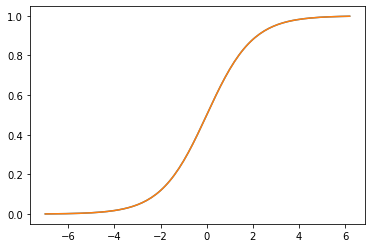

In [26]:
import matplotlib.pyplot as plt
import numpy as np
  
# setting the x - coordinates
x = np.arange(-7, 2*(np.pi), 0.1)

# setting the corresponding y - coordinates
y = 1/(np.exp(-x)+1)

# playing with parameters!
c1 = 1
c2 = 0
z = 1/(np.exp(c1*(-x-c2))+1)


# potting the points
plt.plot(x, y)
plt.plot(x,z)
  
# function to show the plot
plt.show()

The sigmoid function is very useful for binary classification problems, as it maps the vast majority of x values to either 0 or 1!

When we perform a logistic regression, we want to find a the sigmoid function that will best map our predictive features (our $X$) to either 0 or 1 (our $y$).

What are the parameters of a sigmoid function?  They are $c_1$ and $c_2$.  Note that $c_1$ changes the "steepness" of the curve, while $c_2$ moves the intercept.  Try playing with the code above by entering your own $c_1$ and $c_2$ parameters, and see how it changes the graph!

![picture](https://drive.google.com/uc?id=1xMETIxNNidJFiFSDfTZoQM884RU-5kTF)

*Image credit:*  https://www.researchgate.net/figure/A-Basic-sigmoid-function-with-two-parameters-c1-and-c2-as-commonly-used-for-subitizing_fig2_325868989

## **Maximizing the log-likelihood function**

Let's call one **sample**, or **row**, $x^{(i)}$.  The **classification**, or **label**, of this one sample is $y^{(i)}$.  Let's call our **parameters**, or **weights**, $\theta$--in the graph above, $\theta$ is the vector $\begin{bmatrix} c_1
\\ c_2 \end{bmatrix}$.

Each label $y$ can be thought of as a Bernoulli random variable:
$$Y \sim Ber(p)$$


$$P\left(Y=y|p \right) = \left(p\right)^{y}
\cdot \left[1 - p\right]^{1-y}$$

What is the probability $p$?
$$p = \sigma(\theta^Tx)$$

So then you calculate the Bernouli PMF with this probability:

$$Y \sim Ber\left(\sigma(\theta^Tx)\right)$$



$$P\left(Y=y|X=x\right) = \left(\sigma(\theta^Tx)\right)^{y}
\cdot \left[1 - \sigma(\theta^Tx)\right]^{1-y}$$

Likelihood of all the data:

$$L(\theta) =  \prod_{i=1}^n P\left(Y=y^{(i)}|X=x^{(i)}\right) $$
$$ = \prod_{i=1}^n \left(\sigma(\theta^Tx^{(i)})\right)^{y^{(i)}}
\cdot \left[1 - \sigma(\theta^Tx^{(i)})\right]^{1-y^{(i)}}$$

Now we can take the log of our likelihood function!  Why?

$$LL(\theta) = \log \left( \prod_{i=1}^n \left(\sigma(\theta^Tx^{(i)})\right)^{y^{(i)}}
\cdot \left[1 - \sigma(\theta^Tx^{(i)})\right]^{1-y^{(i)}}\right)$$
$$  = \sum_{i=1}^n y^{(i)} \log \left(\sigma(\theta^Tx^{(i)})\right)
+ (1-y^{(i)}) \log\left[1 - \sigma(\theta^Tx^{(i)})\right]$$

To perform gradient "ascent", we need to calculate the gradient (derivative with respect to $\theta$).  Then we get:

$$\frac{\partial LL(\theta)}{\partial \theta_j}
= \sum_{i=1}^n \left[y^{(i)} - \left(\sigma(\theta^Tx^{(i)})\right) \right]x^{(i)}_j $$

You can see all of the steps of taking the derivative here:
https://web.stanford.edu/class/archive/cs/cs109/cs109.1178/lectureHandouts/220-logistic-regression.pdf

Finally, we can estimate the optimal $\theta$ with gradient ascent by iteratively computing:

$$\theta^{\text{ new}}_j =\theta^{\text{ old}}_j + \alpha  \frac{\partial LL(\theta^{\text{ old}}_j)}{\partial \theta^{\text{ old}}_j}$$
$$= \theta^{\text{ old}}_j + \alpha  \sum_{i=1}^n \left[y^{(i)} - \left(\sigma([\theta^{\text{ old}}]^T x^{(i)})\right) \right]x^{(i)}_j $$

Here, $\alpha$ is the learning rate.

## **Some SciKit-Learn fuctions you may find helpful on your homework:**

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
